# About dataset

Data Reference:

* This Hadi Fanaee-T
* Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal

* Data Description:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
 1. Clear, Few clouds, Partly cloudy
 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +   
     Scattered clouds
 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are divided to 41 (max)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

##Credit : Dr. Ryan Ahmed, 
            SuperDatascience 
This notebooke documents the model development for the Kaggle Bike Sharing Dataset uisng ANN

# import library

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder           # to convert the categorical data into one hot incoding 

# load  dataset 

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/shivckr/Dataset/master/bike_sharing.csv')

# Dataset clean up 

In [34]:
#data.head()

In [35]:
print(f'is dataset column has null  : {data.isnull().sum()}')

is dataset column has null  : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


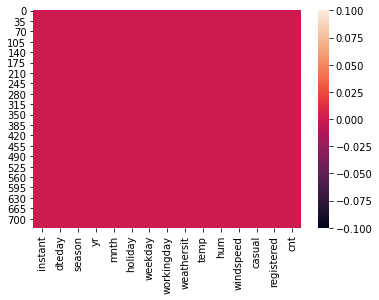

In [36]:
#Alternative method for finding null values present in dataset
sns.heatmap(data.isnull()) 
# missing value is shown by change in color in heatmap 

dataset has no missing values

In [37]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [39]:
# delete instant column from dataset, since it has nothing to add in prediction 
data = data.drop(labels=['instant'], axis=1) 

In [40]:
# delete casual and registered column
data = data.drop(labels=['casual', 'registered'], axis =1 )  

In [41]:
# change date format form 'm/d/yyyy' to 'MM - dd yyy'
data.dteday = pd.to_datetime(data.dteday,format = '%m/%d/%Y')

In [42]:
# set date column as index column
data.index = pd.DatetimeIndex(data.dteday)

In [43]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [44]:
data = data.drop(labels=['dteday'], axis = 1)

# visualize data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fabc5b0b8>,
      dtype=object)

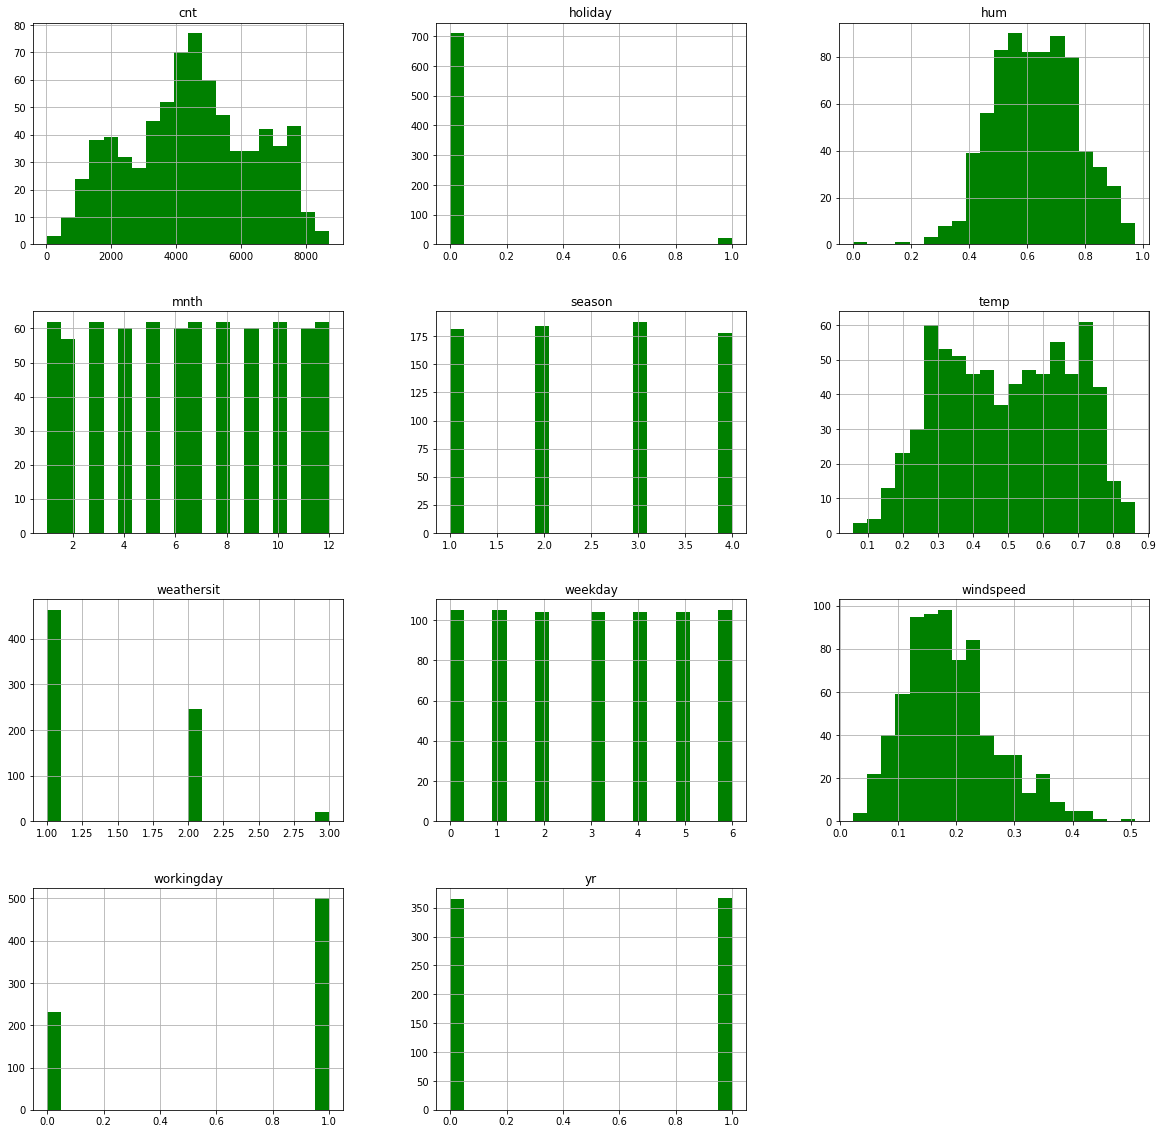

In [45]:
data.hist(bins = 20, figsize = (20,20), color = 'g')

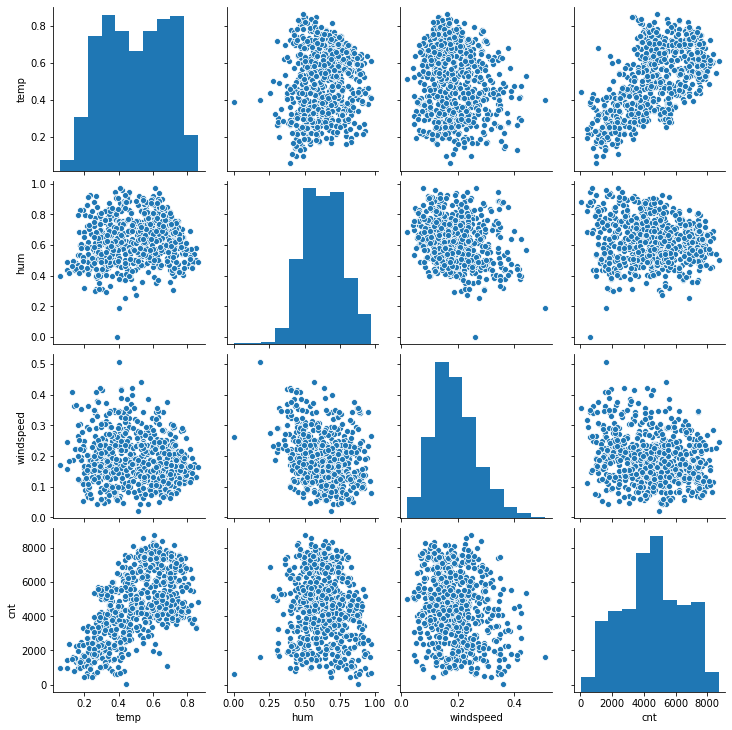

In [46]:
X_numerical = data[['temp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(X_numerical)

observation from above plot 
* 'Temperature' and 'count' has  rougly liner relation
*  Usage is almost zero when 'humidity' < 0.25  unit 
*  usage is high when 'windspeed' < 0.3 unit 

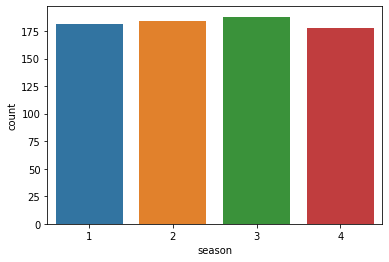

In [47]:
sns.countplot(x= 'season', data= data)

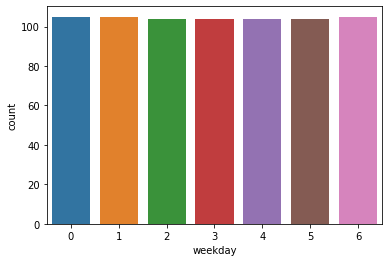

In [48]:
sns.countplot(x = 'weekday', data= data)

So bike usage does not vary with 'weekday' and hence is very weak predictor 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


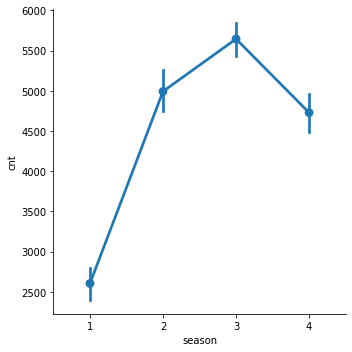

In [49]:
sns.factorplot(x= 'season', y = 'cnt', data = data)

observation: Above two plot says 'Season 3' has bagged highest usage

In [50]:
#sns.factorplot(x = 'holiday', col = 'cnt', data = data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8011ddd048> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 250560x360 with 696 Axes>

In [ ]:
corr = X_numerical.corr()

In [ ]:
sns.heatmap(corr, annot = True)

* Temperature and count have high relation...
* While humidity and count has negligible relation

In [ ]:
data.columns

In [ ]:
data.cnt.asfreq('M').plot()
plt.xlabel('Month')
plt.ylabel('count of bike')
plt.title('Bike usages with Month')

In [ ]:
data.cnt.asfreq('W').plot()
plt.xlabel('Week')
plt.ylabel('count of bike')
plt.title('Bike usages with Week')

In [ ]:
data['cnt'].asfreq('Q').plot(linewidth = 3)
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

In [ ]:
sns.pairplot(data)

# Create traing and test data

In [ ]:
data.columns

In [ ]:
X_cat = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

 why one hot incoding is required :
  https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [ ]:
## perform one hot encoing for categorical data 
onehotincoding = OneHotEncoder()
X_cat = onehotincoding.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

In [ ]:
# convert ndarray into dataframe again 
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_numerical.head()

In [ ]:
X_numerical = X_numerical.reset_index()

In [ ]:
X_numerical.head()

In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [ ]:
X_all


In [ ]:
#X_all = X_all.drop(labels=['index'], axis = 1)

In [ ]:
X_all = X_all.drop(labels=['dteday'], axis = 1)

  * slicing with `.loc `*

> * .loc uses label based indexing to select both rows and columns. The labels being the values of the index or the columns. Slicing with `.loc` includes the last element.



> Let's assume we have a DataFrame with the following   
  columns:
  `foo, bar, quz, ant, cat, sat, dat.`

* selects all rows and all columns beginning at 'foo' up to  
  and including 'sat'
`df.loc[:, 'foo':'sat']`
 
 foo bar quz ant cat sat

> Indented block



 * silicing with iloc 

In [ ]:
X = X_all.iloc[:, :-1].values
print(X.shape)

In [ ]:
y = X_all.iloc[:,-1:]
y.shape

* what is normalization : https://www.statisticshowto.com/normalized/


* why normalization in ML : https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029#:~:text=The%20goal%20of%20normalization%20is,when%20features%20have%20different%20ranges.


In [ ]:
# Normalize output column 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3) 

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

# Train model 

In [ ]:
#define model 
model = tf.keras.Sequential()
#add layers into model 
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units = 100, activation='relu'))
model.add(tf.keras.layers.Dense(units = 200, activation='relu' ))
model.add(tf.keras.layers.Dense(units = 100, activation='relu' ))
model.add(tf.keras.layers.Dense(units=1, activation= 'linear'))


In [ ]:
# find model summary, weights and biases(Param column)
model.summary()

In [ ]:
# model optimization
model.compile(optimizer= 'Adam', loss = 'mean_squared_error')
#model.compile(optimizer=tf.keras.optimizers.Adam, loss='mean_squared_error')

In [ ]:
#fit model 
# about batch size : https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/
# about model.fit parameter : https://keras.rstudio.com/reference/fit.html

epochs_hist = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_split = 0.2)

# Evaluate model 

In [ ]:
epochs_hist.history.keys()

In [ ]:


plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

 ## Important obsevation:
 At Epochs where 'Training loss' & 'Validation loss' cosses each other is the point where model starts overfitting data 

# Make pediction 


In [ ]:
y_train.shape

In [ ]:
y_predict = model.predict(X_test)
plt.plot( y_test, y_predict, '+',color  = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [ ]:
print(type(y_test), type(y_predict))

In [ ]:
# rescale 'cnt' column to original 
y_test_orig = scaler.inverse_transform(y_test)
y_predict_orig = scaler.inverse_transform(y_predict)

In [ ]:
# create dataframe  with dictionary  
data_col = {'Actual_value':list(y_test_orig), 'Predicted_value':list(y_predict_orig)}   
model_accuracy_df = pd.DataFrame(data_col)
# model_accuracy_df.head()
'''
# create dataframe  with list 
data_col = [list(y_test_orig), list(y_predict_orig)]    
model_accuracy_df = pd.DataFrame(data_col, index=['Actual_value','Predicted_value'])
'''

In [ ]:
sns.scatterplot(data = model_accuracy_df, x= 'Actual_value', y = 'Predicted_value')

#Calculate accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

RMSE =  format(sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3f')
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
MSE = mean_squared_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test,y_predict)
print(f'RMSE->{RMSE}, MAE->{MAE}, MSE->{MSE}, r2->{r2}')

#here we see RMSE, MAE, MSE are dependent on scale, but r2 is independent of scale of variable 
# try with (y_test, y_predict) & (y_test_orig, y_predict_orig). You will understand 

In [ ]:
# calculate adjusted r square 
k = X_test.shape[1]  # number of features (columns)
n = len(X_test)      # number of datapoints (rows )
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print (f'Adjusted r square {adj_r2}')